In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

400
100.0
{None: 0, 'D': 31, 'X': 23, '/': 35, '*': 39, '1': 42, 'A': 35, 'P': 37, 'B': 61, '-': 31, 'W': 26, '0': 30, '8': 10}


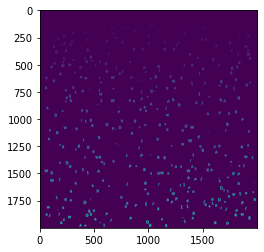

In [ ]:
def lakes_and_bays(image):
  b = ~image
  lb = label(b)
  regs = regionprops(lb)
  count_lakes=0
  count_bays = 0
  for reg in regs:
    on_bound = False
    for y,x in reg.coords:
      if y == 0 or x == 0 or y == image.shape[0] - 1 or x == image.shape[1] - 1:
        on_bound = True
        break
    if not on_bound:
      count_lakes+=1
    else:
      count_bays += 1
  return count_lakes,count_bays

def has_vline(region):
  lines = np.sum(region.image,0) // region.image.shape[0]
  return 1 in lines

def filling_factor(region):
  return np.sum(region.image) / region.image.size

def lakes_area(image):
  return (np.sum(region.filled_image) - np.sum(region.image)) / region.image.size


def recognize(region):
  if np.all(region.image):
    return '-'
  cl,cb = lakes_and_bays(region.image)
  if cl == 2:
    if has_vline(region):
      return 'B'
    else:
      return '8'
  if cl == 1:
    if cb == 2:
      lakes_a = lakes_area(region)
      if lakes_a > 0.2:
        return 'D'
      else:
        return 'P'
    elif cb == 3:
      return 'A'
    elif cb == 4:
      return '0'

  if cl == 0:
    if has_vline(region):
        return '1'
    if cb == 2:
      return '/'

    cut_cl, cut_cb = lakes_and_bays(region.image[2:-2, 2:-2])
    if cut_cb == 4:
      return 'X'
    if cut_cb == 5:
      cy = region.image.shape[0] // 2
      cx = region.image.shape[1] // 2
      if region.image[cy,cx] > 0:
        return '*'
      return 'W'
    
    
  return None

image = plt.imread('symbols.png')
binary = np.sum(image,2)
binary[binary>0] = 1

labeled = label(binary)
print(np.max(labeled))

regions = regionprops(labeled)

d = {None: 0}
for region in regions:
  symbol = recognize(region)
  if symbol not in d:
    d[symbol] = 0
  d[symbol] += 1

print(round((1. - d[None] / sum(d.values()))*100,2))

print(d)
plt.imshow(labeled)
plt.show()